In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
df = pd.read_csv('Sales.csv')
print("Initial Shape:", df.shape)
print(df.head())

Initial Shape: (10000, 7)
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   381.337555   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4        NaN       High Value    229.685623          NaN   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                          NaN            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  


In [23]:
df['Group'].fillna(df['Group'].mode()[0], inplace=True)
df['Customer_Segment'].fillna(df['Customer_Segment'].mode()[0], inplace=True)
df['Sales_Before'].fillna(df['Sales_Before'].median(), inplace=True)
df['Sales_After'].fillna(df['Sales_After'].median(), inplace=True)
df['Customer_Satisfaction_Before'].fillna(df['Customer_Satisfaction_Before'].median(), inplace=True)
df['Customer_Satisfaction_After'].fillna(df['Customer_Satisfaction_After'].median(), inplace=True)
df['Purchase_Made'].fillna('No', inplace=True)

In [24]:
df['Purchase_Made'] = df['Purchase_Made'].astype(str).str.strip().str.lower()
df['Purchase_Made'] = df['Purchase_Made'].replace({'yes':1, 'no':0, 'y':1, 'n':0, '1':1, '0':0})

In [25]:
if df['Purchase_Made'].notna().sum() == 0:
    raise ValueError("No valid Purchase_Made values found after mapping. Check your data.")
df = df[df['Purchase_Made'].isin([0,1])]

In [26]:
df['Sales_Diff'] = df['Sales_After'] - df['Sales_Before']
df['Satisfaction_Diff'] = df['Customer_Satisfaction_After'] - df['Customer_Satisfaction_Before']

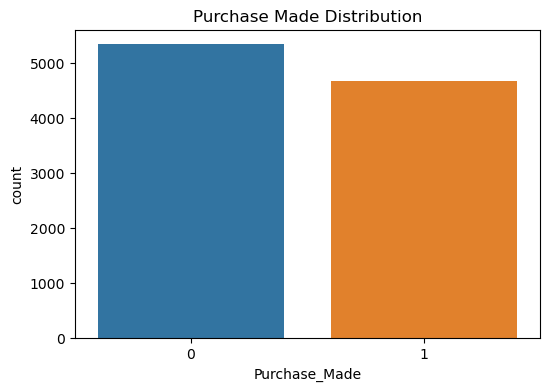

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='Purchase_Made', data=df)
plt.title('Purchase Made Distribution')
plt.show()

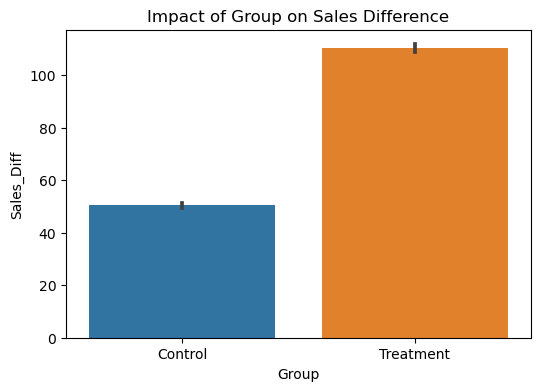

In [28]:
plt.figure(figsize=(6,4))
sns.barplot(x='Group', y='Sales_Diff', data=df)
plt.title('Impact of Group on Sales Difference')
plt.show()

In [29]:
le = LabelEncoder()
df['Group'] = le.fit_transform(df['Group'])
df['Customer_Segment'] = le.fit_transform(df['Customer_Segment'])

In [30]:
X = df[['Group','Customer_Segment','Sales_Before','Sales_After','Customer_Satisfaction_Before','Customer_Satisfaction_After','Sales_Diff','Satisfaction_Diff']]
y = df['Purchase_Made']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.517
              precision    recall  f1-score   support

           0       0.52      1.00      0.68      1035
           1       0.00      0.00      0.00       965

    accuracy                           0.52      2000
   macro avg       0.26      0.50      0.34      2000
weighted avg       0.27      0.52      0.35      2000



In [33]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.505
              precision    recall  f1-score   support

           0       0.52      0.63      0.57      1035
           1       0.48      0.37      0.42       965

    accuracy                           0.51      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.50      0.51      0.50      2000



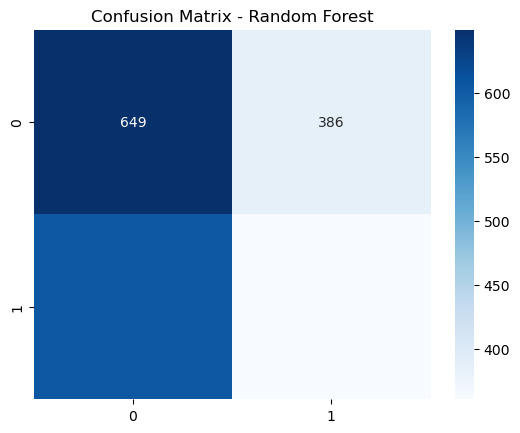

In [34]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

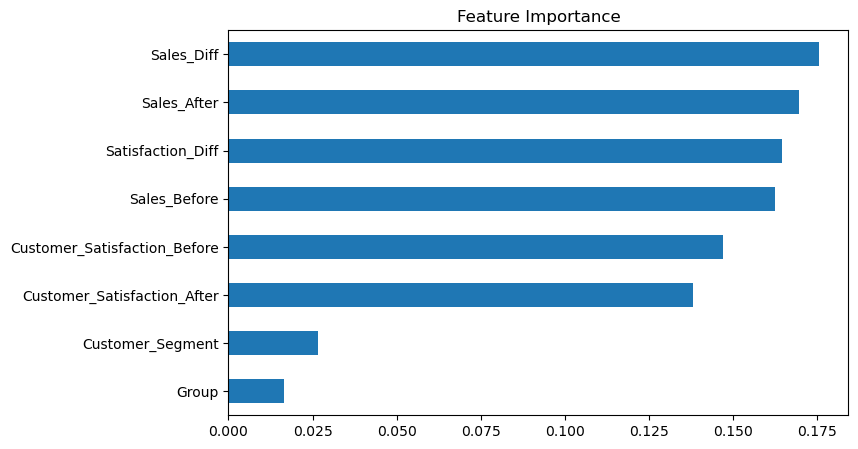

In [35]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,5), title='Feature Importance')
plt.show()

In [1]:
print("\nBusiness Insights:")
print("- The marketing campaign seems to increase sales in the Treatment group.")
print("- Customer segment significantly influences purchase behavior.")


Business Insights:
- The marketing campaign seems to increase sales in the Treatment group.
- Customer segment significantly influences purchase behavior.
